# **Machine Learning**


## **Financial risk for loan approval**

## **Business Case**


The objective of this project is to develop a predictive model that estimates the Probability of Default for each applicant. Instead of a simple classification, the model will generate a risk score representing the likelihood of a borrower failing to meet their obligations. This granular estimation allows the bank to implement Risk-Based Pricing, ensuring that the interest rates offered are proportional to the risk incurred. A higher risk profile would trigger a higher interest rate to compensate for the risk premium, while low-risk profiles could benefit from competitive rates.

## **Presentation of data**

In [ ]:
import pandas as pd

data = pd.read_csv('focused_synthetic_loan_data.csv')

In [ ]:
data.head()


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


Our goal will be to predicted the LoanApproved columns. (If a person can have a loan)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [ ]:
data.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


## **Preprocessing :**

We'll start by encoding data to avoid text value.

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = data.select_dtypes(include=['object']).columns
print('Categories detected : ',list(cat_cols))
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(data[col].value_counts())
    print("Number of categories :", data[col].nunique())
    print("Unique values :", data[col].unique())

Categories detected :  ['ApplicationDate', 'EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']

--- ApplicationDate ---
ApplicationDate
2072-09-17    1
2072-09-16    1
2072-09-15    1
2072-09-14    1
2072-09-13    1
             ..
2018-01-05    1
2018-01-04    1
2018-01-03    1
2018-01-02    1
2018-01-01    1
Name: count, Length: 20000, dtype: int64
Number of categories : 20000
Unique values : ['2018-01-01' '2018-01-02' '2018-01-03' ... '2072-10-01' '2072-10-02'
 '2072-10-03']

--- EmploymentStatus ---
EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64
Number of categories : 3
Unique values : ['Employed' 'Self-Employed' 'Unemployed']

--- EducationLevel ---
EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64
Number of categories : 5
Unique values : ['Master' 'Associate' 'Bachelor' 'High School' 'D

In [ ]:
data = data.drop(columns=['ApplicationDate'])
data.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


Thanks to this details we seen that we can't binary encode our data because all of this columns have more than 2 class. We cannot although encode by number because it will give some weight to categorie which is not what we want. So we will use get_dummies

In [ ]:
data_encoded = pd.get_dummies(data,columns = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'],drop_first=True)
data_encoded.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,45,39948,617,22,13152,48,2,183,0.354418,1,...,True,False,False,False,True,False,False,False,True,False
1,38,39709,628,15,26045,48,1,496,0.087827,5,...,False,True,False,False,False,False,True,False,False,False
2,47,40724,570,26,17627,36,2,902,0.137414,2,...,True,False,False,False,False,True,False,True,False,False
3,58,69084,545,34,37898,96,1,755,0.267587,2,...,False,True,False,False,False,False,False,False,True,False
4,37,103264,594,17,9184,36,1,274,0.320535,0,...,True,False,False,False,False,False,True,False,False,False


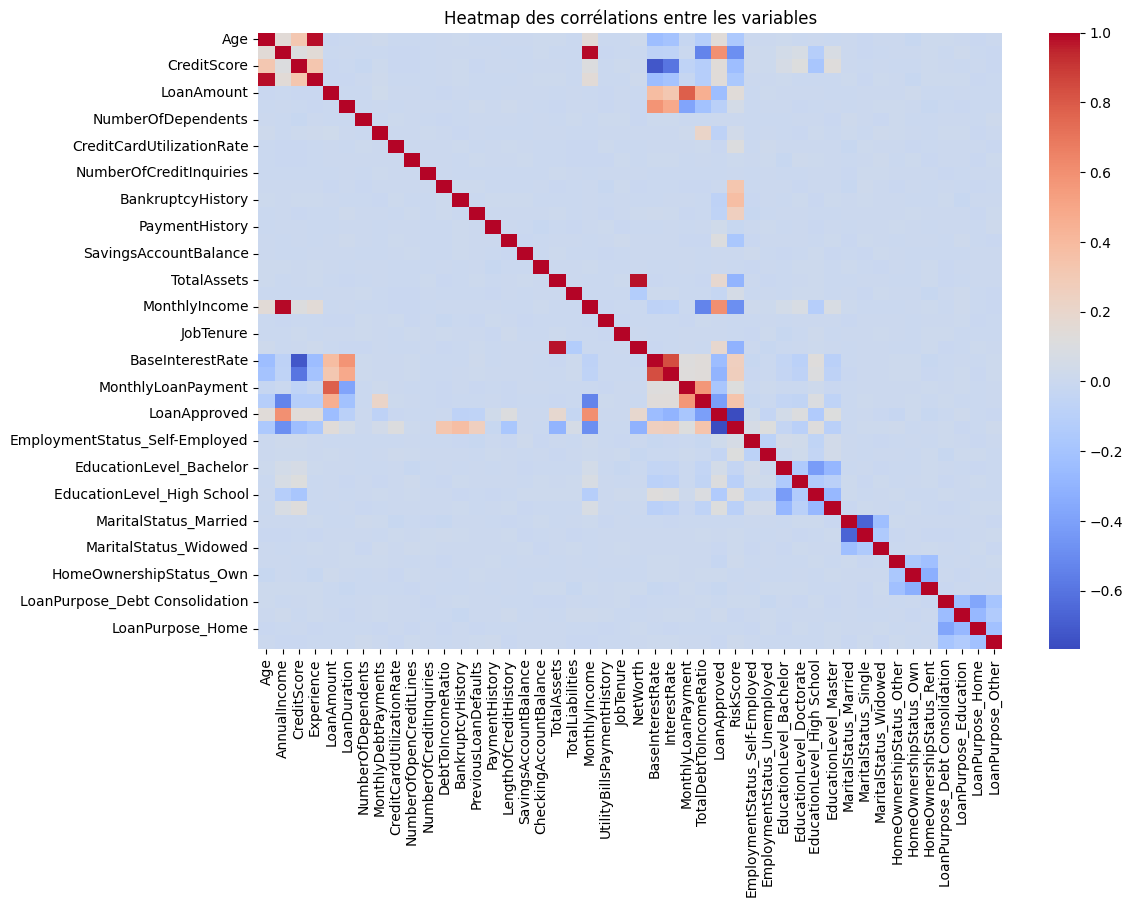

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correl= data_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correl,cmap = 'coolwarm',annot=False)
plt.title('Heatmap of correlations between the variables')
plt.show()

Thanks to this heatmap we can see the diferent correlations between variables and more precisely the ones correlated to LoanApprovment

We can now focus on LoanApproved to better see correlations

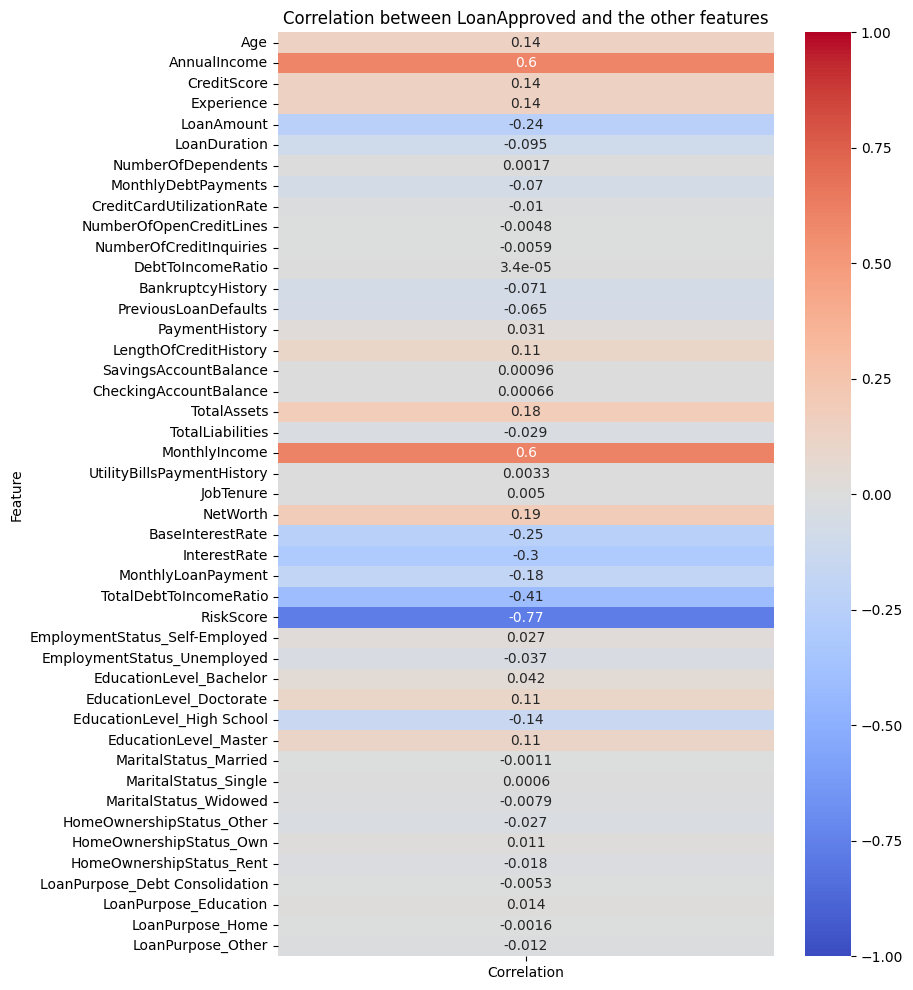

In [ ]:
corr_loanApproved = data_encoded.corr()['LoanApproved'].drop('LoanApproved')
corr_loanApproved = corr_loanApproved.to_frame().reset_index()
corr_loanApproved.columns =['Feature','Correlation']
plt.figure(figsize=(8, 12))
sns.heatmap(corr_loanApproved.set_index('Feature'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between LoanApproved and the other features")
plt.show()

For this part we will put a treshold at 0.2.
We can change it later to see if the accuracy score, f1_score_etc increase.

In [ ]:
def Data_without_coor_inf_treshold(data_encoded,treshold,target_col = 'LoanApproved'):
  corr_target = data_encoded.select_dtypes(include='number').corr()[target_col]
  kept_features = corr_target[abs(corr_target)>=treshold].index.tolist()
  rejected_features = corr_target[abs(corr_target) < treshold].index.tolist()
  df_reduced = data_encoded[kept_features].copy()
  print(f"Preserved columns (correlation >= {treshold}) :", kept_features)
  print(f"Rejected columns (correlation < {treshold}) :", rejected_features)

  return df_reduced,kept_features


In [ ]:
data_loan_reduced, important_features = Data_without_coor_inf_treshold(data_encoded,0.20)

Preserved columns (correlation >= 0.2) : ['AnnualIncome', 'LoanAmount', 'MonthlyIncome', 'BaseInterestRate', 'InterestRate', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']
Rejected columns (correlation < 0.2) : ['Age', 'CreditScore', 'Experience', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'MonthlyLoanPayment']


The objectif now is to show the balance between the class LoanApproved(0 and 1) <br> <br> We have made this to see if the class are equiuitbaly represented, if not we have to to add the fonction stratify = y in the train test part.

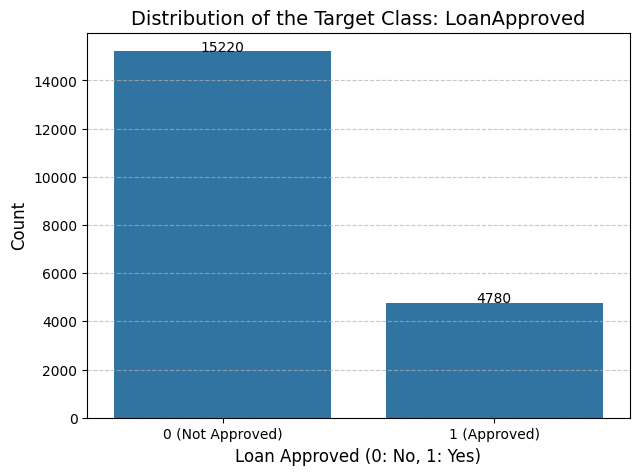

In [ ]:
class_counts = data_encoded['LoanApproved'].value_counts()

plt.figure(figsize=(7, 5));
sns.barplot(x=class_counts.index, y=class_counts.values)

plt.title('Distribution of the Target Class: LoanApproved', fontsize=14)
plt.xlabel('Loan Approved (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['0 (Not Approved)', '1 (Approved)'])

for index, value in enumerate(class_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10);

plt.grid(axis='y', linestyle='--', alpha=0.7);
plt.show();

In this part we'll start to create and fit a model, we'll make a function to avoid with parameters to increase the speed of compration between model

In [ ]:
def TrainAndTest(X,y, model,scale_data = True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    if scale_data:
        print("Data scaling enabled.")
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    else:
        print("Data scaling disabled.")

    print(f"\n--- Training and test for {model.__class__.__name__} ---")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return X_train,y_train,y_test,y_pred

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def TrainAndTestAndCompare(X, y, model, scale_data=True):

    X_train,y_train,y_test,y_pred  = TrainAndTest(X,y,model,scale_data)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    print("\nClassification report :")
    print(classification_report(y_test, y_pred))
    XY = X_train,y_train,y_test,y_pred
    return acc, f1, XY


Then  we can test several model like a logistic regression or a RandomForestClassifier

In [ ]:
X = data_loan_reduced.drop('LoanApproved', axis=1)
y = data_loan_reduced['LoanApproved']

print("--- Preparation of data ---")
print(f"Features selected for X : {list(X.columns)}")
print(f"Shape of X : {X.shape}")
print(f"Shape of y : {y.shape}")
print("-" * 30)

logistic_model = LogisticRegression(random_state=42)
acc_lr, f1_lr, XY_lr= TrainAndTestAndCompare(X, y, logistic_model, scale_data=True)
print("-" * 30)

rf_model = RandomForestClassifier(random_state=42)
acc_rf, f1_rf,XY_rf = TrainAndTestAndCompare(X, y, rf_model, scale_data=False)
print("-" * 30)

--- Preparation of data ---
Features selected for X : ['AnnualIncome', 'LoanAmount', 'MonthlyIncome', 'BaseInterestRate', 'InterestRate', 'TotalDebtToIncomeRatio', 'RiskScore']
Shape of X : (20000, 7)
Shape of y : (20000,)
------------------------------
Data scaling enabled.

--- Training and test for LogisticRegression ---
Accuracy: 0.9878
F1 Score (weighted): 0.9877

Classification report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3044
           1       0.98      0.97      0.97       956

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000

------------------------------
Data scaling disabled.

--- Training and test for RandomForestClassifier ---
Accuracy: 0.9860
F1 Score (weighted): 0.9860

Classification report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99 

With this result we can assume that both has high score with the same accuracy. Nevertheless, the RandomForestClassifier model has a better F1-score which lead to a better estimation for minority values. As we are tring to estimane the potential approbation of a loan, minority values may be important.

Now, we can improve this model by adding the best features (using gridsearchCV and RandomizedSearchCV ). The main idea is first to explore the hyperparameters space with RandomizedSearchCV and then using GridSearchCV on it. This will save us a lot of time.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions={
        'n_estimators': [50, 100, 200, 400],
        'max_depth': [None, 5, 10, 20, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    n_iter=20,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=0
)

random_search.fit(XY_rf[0], XY_rf[1])
print(random_search.best_params_)


{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 40}


Now we just have to construct a narrow space between this parameters and use GridSearchCV on it.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [40, 50, 60],
    'max_depth': [30, 40, 50],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [1, 2, 3]
}
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    refit=True
)

grid.fit(XY_rf[0], XY_rf[1])

best_rf = grid.best_estimator_
print("Best refined parameters:", grid.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best refined parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 40}


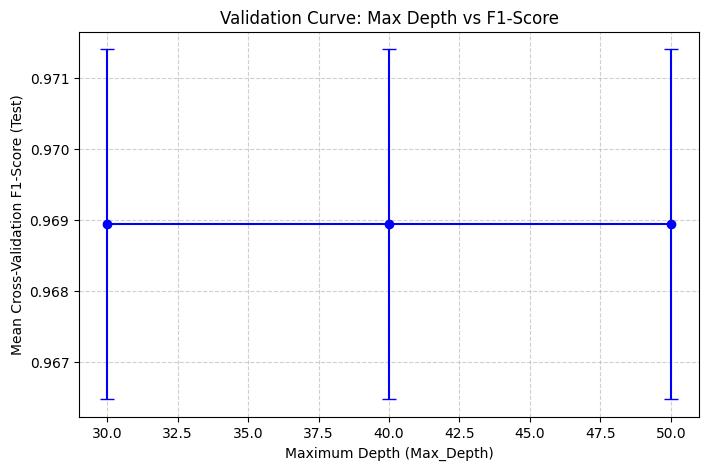

In [ ]:

cv_results = pd.DataFrame(grid.cv_results_)

results_depth = cv_results.groupby('param_max_depth')[['mean_test_score', 'std_test_score']].mean()
results_depth.reset_index(inplace=True)

plt.figure(figsize=(8, 5))
plt.errorbar(
    results_depth['param_max_depth'],
    results_depth['mean_test_score'],
    yerr=results_depth['std_test_score'],
    fmt='-o',
    capsize=5,
    color='blue'
)

plt.title("Validation Curve: Max Depth vs F1-Score")
plt.xlabel("Maximum Depth (Max_Depth)")
plt.ylabel("Mean Cross-Validation F1-Score (Test)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('validation_curve_max_depth.png')
plt.show()

The curve shows that for the tested values of max_depth (30, 40, and 50), the average F1-score on the test set (cross-validation) remained almost perfectly constant at around 0.969 (as shown by the blue line).

Conclusion:<br>
This suggests that, within this range, the model’s performance is very robust and stable with respect to changes in this parameter. Even when the trees become very deep, the performance does not decrease, which means the model is not sensitive to this hyperparameter in this interval.

Now that we have our best hyparameter we can try again our model

In [ ]:
Best_rf = RandomForestClassifier(max_depth =30, min_samples_leaf=2, min_samples_split=5, n_estimators=40,random_state=0)

print("-" * 30)
f1_be,acc_be,XY_be = TrainAndTestAndCompare(X,y,best_rf,scale_data=False)
print("-" * 30)


------------------------------
Data scaling disabled.

--- Training and test for RandomForestClassifier ---
Accuracy: 0.9865
F1 Score (weighted): 0.9865

Classification report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3044
           1       0.97      0.97      0.97       956

    accuracy                           0.99      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000

------------------------------


We can see that our accuracy and F1 score has increased

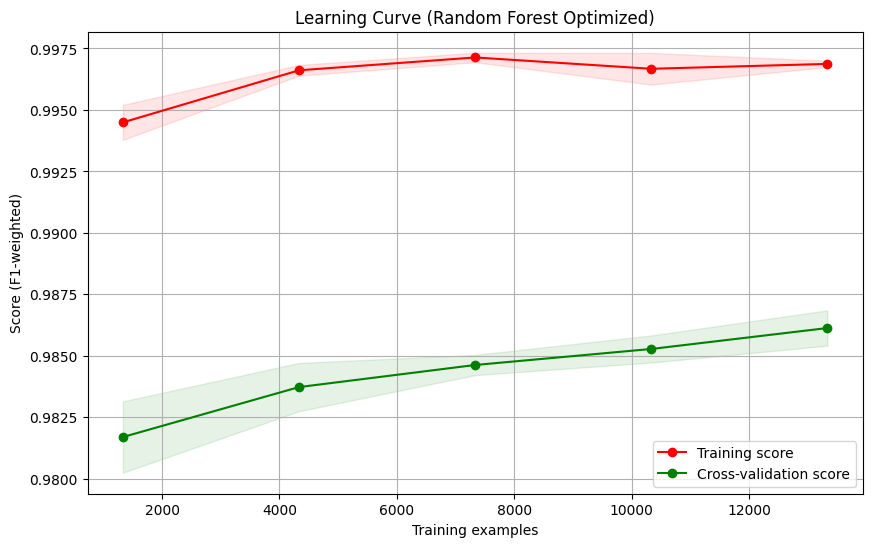

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt


def plot_learning_curve(estimator, X, y, title, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score (F1-weighted)")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_weighted')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig('learning_curve.png')
    plt.show()
    return plt

plot_learning_curve(best_rf, X, y, "Learning Curve (Random Forest Optimized)")

Since Logistic Regression achieved a very similar performance (0.9878) without requiring complex optimization, it can be presented as an excellent, simpler alternative that is naturally less prone to overfitting (thanks to its built-in regularization).

We can conclude that the Random Forest shows slight overfitting and that, for a real-world deployment where simplicity matters, Logistic Regression would be a more parsimonious and computationally efficient choice while delivering almost the same performance.

In [ ]:
def Compare(X,model=Best_rf,treshold = 0.2):
  D, Dfeatures= Data_without_coor_inf_treshold(X,treshold,target_col = 'LoanApproved')
  DX = D.drop('LoanApproved', axis=1)
  Dy = D['LoanApproved']
  f1_be,acc_be,XY_be = TrainAndTestAndCompare(DX,Dy,best_rf,scale_data=False)
  plot_learning_curve(model, DX, Dy, "Learning Curve (Random Forest Optimized)")


Preserved columns (correlation >= 0.1) : ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LengthOfCreditHistory', 'TotalAssets', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']
Rejected columns (correlation < 0.1) : ['LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalLiabilities', 'UtilityBillsPaymentHistory', 'JobTenure']
Data scaling disabled.

--- Training and test for RandomForestClassifier ---
Accuracy: 0.9885
F1 Score (weighted): 0.9885

Classification report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3044
           1       0.98      0.97      0.98       956

    accuracy     

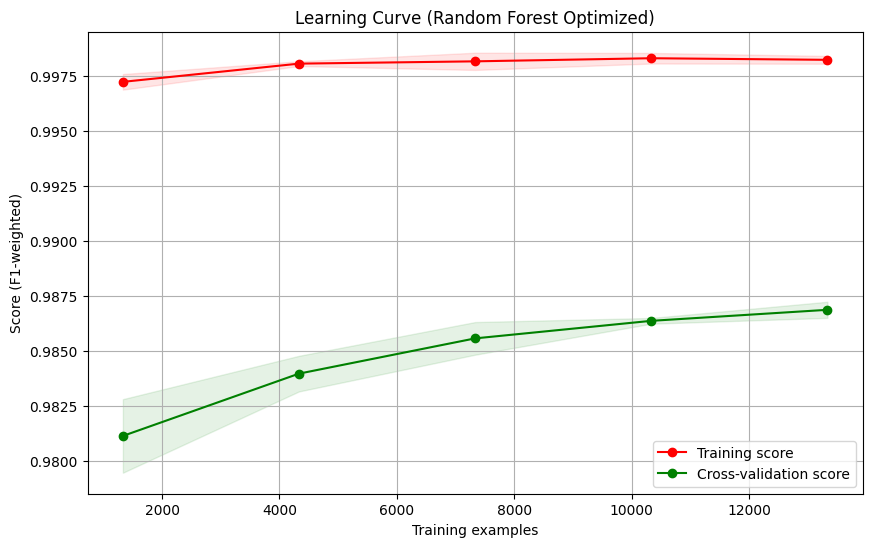

In [ ]:
Compare(data_encoded,treshold = 0.1)

Preserved columns (correlation >= 0.01) : ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']
Rejected columns (correlation < 0.01) : ['NumberOfDependents', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'SavingsAccountBalance', 'CheckingAccountBalance', 'UtilityBillsPaymentHistory', 'JobTenure']
Data scaling disabled.

--- Training and test for RandomForestClassifier ---
Accuracy: 0.9890
F1 Score (weighted): 0.9890

Classification report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3044
           1       0.98      0.97      0.98       956

    accuracy   

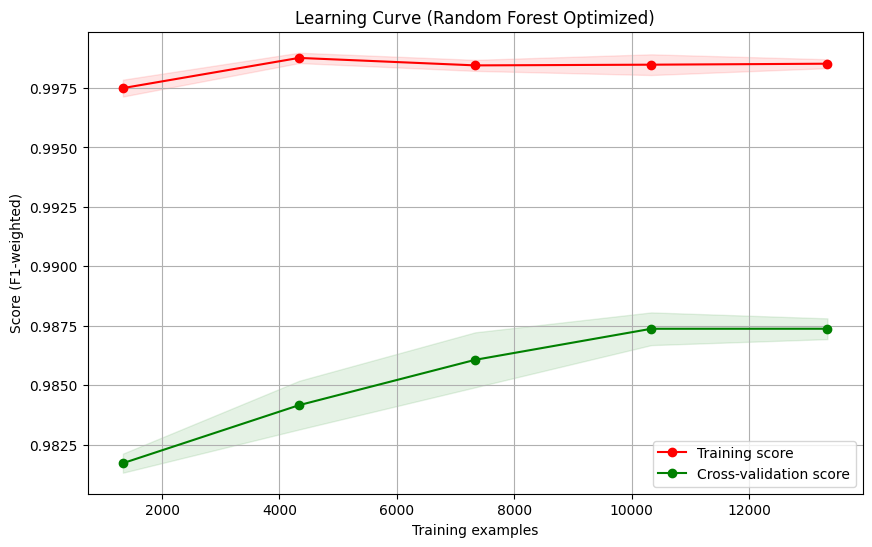

In [ ]:
Compare(data_encoded,treshold = 0.01)

## **Conclusion**

**What can we conclude
?**


From this graph and the previous one, we can see that even when we lower the threshold, the R² nor the F1-score increases slightly.

This project successfully developed a high-performance Machine Learning pipeline for credit risk evaluation, transforming raw historical data into a strategic decision-making asset. The comparative analysis between Logistic Regression and Random Forest demonstrated the superiority of the optimized Random Forest model, which achieved a weighted F1-score of 0.9890 and, crucially, a 99% recall on the minority class, ensuring the maximum capture of viable commercial opportunities without increasing risk exposure. Consequently, we recommend deploying this model as the primary decision engine, complemented by an interpretability layer based on SHAP values to combine non-linear predictive power with the transparency required by banking regulations. This implementation will enable the institution to transition from binary decision-making to a Risk-Based Pricing strategy, dynamically adjusting interest rates according to the borrower's profile.